In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/shruti101/Segmented-Marketing-using-KNN-clustering/main/cluster_data'

In [3]:
df = pd.read_csv(url, sep=',')
df

,Unnamed: 0,Cluster,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,...,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,total_quantity,average_quantity,total_spend,average_spend
0,0,5,11387,64.58,35.91,107.78,27.08,29.59,1.0,54.83,...,28.54,2.0,15.0,7.48,1.0,0.84,545,1.109980,697.76,1.42
1,1,1,8171,16.89,37.24,28.84,33.43,66.40,1.0,22.06,...,3.76,1.0,1.0,9.99,1.0,1.00,330,1.235955,369.31,1.38
2,2,0,1060,87.30,82.98,49.88,20.57,37.04,18.0,9.85,...,1.00,18.0,20.0,106.46,1.0,1.00,432,1.125000,668.68,1.74
3,3,2,3728,84.05,186.56,175.50,119.84,111.08,1.0,13.05,...,1.00,4.0,1.0,1.00,1.0,4.50,1010,1.393103,1104.10,1.52
4,4,1,14621,35.16,121.31,79.23,29.03,37.17,1.0,40.06,...,1.00,1.0,1.0,3.40,1.0,1.00,760,1.124260,524.45,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,1,12541,64.52,73.84,89.36,135.31,61.99,1.0,1.00,...,3.36,1.0,1.0,1.00,1.0,2.53,851,1.113874,800.43,1.05
2996,2996,4,16081,5.91,18.08,18.32,23.69,16.12,1.0,5.39,...,9.74,30.0,1.0,1.00,1.0,1.61,209,1.082902,222.26,1.15
2997,2997,1,7094,116.54,106.08,42.31,35.92,43.59,1.0,13.68,...,2.59,1.0,1.0,1.00,1.0,6.79,354,1.085890,448.42,1.38
2998,2998,6,3457,3.68,13.44,21.96,10.10,12.51,1.0,4.75,...,1.65,1.0,1.0,1.98,1.0,1.00,157,1.068027,115.90,0.79


In [4]:
df = df.drop('Unnamed: 0', axis=1)
df

,Cluster,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,...,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,total_quantity,average_quantity,total_spend,average_spend
0,5,11387,64.58,35.91,107.78,27.08,29.59,1.0,54.83,6.35,...,28.54,2.0,15.0,7.48,1.0,0.84,545,1.109980,697.76,1.42
1,1,8171,16.89,37.24,28.84,33.43,66.40,1.0,22.06,12.09,...,3.76,1.0,1.0,9.99,1.0,1.00,330,1.235955,369.31,1.38
2,0,1060,87.30,82.98,49.88,20.57,37.04,18.0,9.85,57.98,...,1.00,18.0,20.0,106.46,1.0,1.00,432,1.125000,668.68,1.74
3,2,3728,84.05,186.56,175.50,119.84,111.08,1.0,13.05,25.54,...,1.00,4.0,1.0,1.00,1.0,4.50,1010,1.393103,1104.10,1.52
4,1,14621,35.16,121.31,79.23,29.03,37.17,1.0,40.06,1.00,...,1.00,1.0,1.0,3.40,1.0,1.00,760,1.124260,524.45,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,12541,64.52,73.84,89.36,135.31,61.99,1.0,1.00,61.02,...,3.36,1.0,1.0,1.00,1.0,2.53,851,1.113874,800.43,1.05
2996,4,16081,5.91,18.08,18.32,23.69,16.12,1.0,5.39,15.96,...,9.74,30.0,1.0,1.00,1.0,1.61,209,1.082902,222.26,1.15
2997,1,7094,116.54,106.08,42.31,35.92,43.59,1.0,13.68,1.78,...,2.59,1.0,1.0,1.00,1.0,6.79,354,1.085890,448.42,1.38
2998,6,3457,3.68,13.44,21.96,10.10,12.51,1.0,4.75,1.04,...,1.65,1.0,1.0,1.98,1.0,1.00,157,1.068027,115.90,0.79


In [5]:
df.sort_index(ascending=True)

,Cluster,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,...,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,total_quantity,average_quantity,total_spend,average_spend
0,5,11387,64.58,35.91,107.78,27.08,29.59,1.0,54.83,6.35,...,28.54,2.0,15.0,7.48,1.0,0.84,545,1.109980,697.76,1.42
1,1,8171,16.89,37.24,28.84,33.43,66.40,1.0,22.06,12.09,...,3.76,1.0,1.0,9.99,1.0,1.00,330,1.235955,369.31,1.38
2,0,1060,87.30,82.98,49.88,20.57,37.04,18.0,9.85,57.98,...,1.00,18.0,20.0,106.46,1.0,1.00,432,1.125000,668.68,1.74
3,2,3728,84.05,186.56,175.50,119.84,111.08,1.0,13.05,25.54,...,1.00,4.0,1.0,1.00,1.0,4.50,1010,1.393103,1104.10,1.52
4,1,14621,35.16,121.31,79.23,29.03,37.17,1.0,40.06,1.00,...,1.00,1.0,1.0,3.40,1.0,1.00,760,1.124260,524.45,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,12541,64.52,73.84,89.36,135.31,61.99,1.0,1.00,61.02,...,3.36,1.0,1.0,1.00,1.0,2.53,851,1.113874,800.43,1.05
2996,4,16081,5.91,18.08,18.32,23.69,16.12,1.0,5.39,15.96,...,9.74,30.0,1.0,1.00,1.0,1.61,209,1.082902,222.26,1.15
2997,1,7094,116.54,106.08,42.31,35.92,43.59,1.0,13.68,1.78,...,2.59,1.0,1.0,1.00,1.0,6.79,354,1.085890,448.42,1.38
2998,6,3457,3.68,13.44,21.96,10.10,12.51,1.0,4.75,1.04,...,1.65,1.0,1.0,1.98,1.0,1.00,157,1.068027,115.90,0.79


In [6]:
df['Cluster'].unique()

array([5, 1, 0, 2, 6, 3, 4], dtype=int64)

In [7]:
x = df.drop(['Cluster'] , axis =1)
y = df.Cluster

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cluster               3000 non-null   int64  
 1   customer_number       3000 non-null   int64  
 2   fruit_veg             3000 non-null   float64
 3   dairy                 3000 non-null   float64
 4   confectionary         3000 non-null   float64
 5   grocery_food          3000 non-null   float64
 6   grocery_health_pets   3000 non-null   float64
 7   bakery                3000 non-null   float64
 8   newspapers_magazines  3000 non-null   float64
 9   prepared_meals        3000 non-null   float64
 10  soft_drinks           3000 non-null   float64
 11  frozen                3000 non-null   float64
 12  meat                  3000 non-null   float64
 13  tobacco               3000 non-null   float64
 14  drinks                3000 non-null   float64
 15  deli                 

In [9]:
x
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Cluster','average_spend'],axis=1), df['average_spend'], test_size= 0.3)

In [11]:
for num in range(5,20):
    dtr = DecisionTreeRegressor(max_features= 'log2',
     max_leaf_nodes= num,
     min_samples_leaf= 12,
     min_samples_split= 5,
     splitter='best'
       )
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    print('For max_leaf_nodes = %s' % num)
    print('Mean Squared Error',mean_squared_error(pred,y_test))
    print('Mean Absolute Error',mean_absolute_error(pred,y_test))
    print('Root Mean Squared Error',mean_squared_error(pred,y_test)**0.5)
    print('Clusters = ',np.unique(pred))
    print()

For max_leaf_nodes = 5
Mean Squared Error 0.5094835490746531
Mean Absolute Error 0.44300799225262405
Root Mean Squared Error 0.7137811632949227
Clusters =  [1.49419412 1.7420649  1.9592     2.13523364 3.47738095]

For max_leaf_nodes = 6
Mean Squared Error 0.4699988670836208
Mean Absolute Error 0.4205057700166918
Root Mean Squared Error 0.6855646337754164
Clusters =  [1.53955056 1.54995935 1.9292638  2.111875   2.87893805 4.81416667]

For max_leaf_nodes = 7
Mean Squared Error 0.4568767072584569
Mean Absolute Error 0.4124507468745177
Root Mean Squared Error 0.67592655463331
Clusters =  [1.42428329 1.76305361 1.98403292 2.11496732 2.57659574 3.22842105
 3.459     ]

For max_leaf_nodes = 8
Mean Squared Error 0.4211844122813563
Mean Absolute Error 0.4005548713337109
Root Mean Squared Error 0.6489872204299221
Clusters =  [1.40204271 1.63535637 1.92374269 2.05280992 2.7154386  2.84896552
 2.88866667 4.19058824]

For max_leaf_nodes = 9
Mean Squared Error 0.5636995930968524
Mean Absolute Error 

In [12]:
num = 11
dtr = DecisionTreeRegressor(max_features= 'log2',
     max_leaf_nodes= num,
     min_samples_leaf= 12,
     min_samples_split= 5,
     splitter='best')
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_features='log2', max_leaf_nodes=11,
                      min_samples_leaf=12, min_samples_split=5)

In [13]:
feats = x_train.columns

In [14]:
text_representation = tree.export_text(dtr)
print(text_representation)

|--- feature_0 <= 4370.50
|   |--- feature_4 <= 8.97
|   |   |--- feature_17 <= 17.50
|   |   |   |--- value: [1.40]
|   |   |--- feature_17 >  17.50
|   |   |   |--- value: [2.80]
|   |--- feature_4 >  8.97
|   |   |--- value: [1.44]
|--- feature_0 >  4370.50
|   |--- feature_17 <= 97.88
|   |   |--- feature_3 <= 10.24
|   |   |   |--- feature_8 <= 7.44
|   |   |   |   |--- value: [2.49]
|   |   |   |--- feature_8 >  7.44
|   |   |   |   |--- value: [2.03]
|   |   |--- feature_3 >  10.24
|   |   |   |--- value: [1.58]
|   |--- feature_17 >  97.88
|   |   |--- feature_3 <= 24.24
|   |   |   |--- feature_1 <= 24.09
|   |   |   |   |--- feature_15 <= 3.59
|   |   |   |   |   |--- feature_22 <= 1.20
|   |   |   |   |   |   |--- value: [3.36]
|   |   |   |   |   |--- feature_22 >  1.20
|   |   |   |   |   |   |--- value: [4.66]
|   |   |   |   |--- feature_15 >  3.59
|   |   |   |   |   |--- value: [2.78]
|   |   |   |--- feature_1 >  24.09
|   |   |   |   |--- value: [2.24]
|   |   |--- f

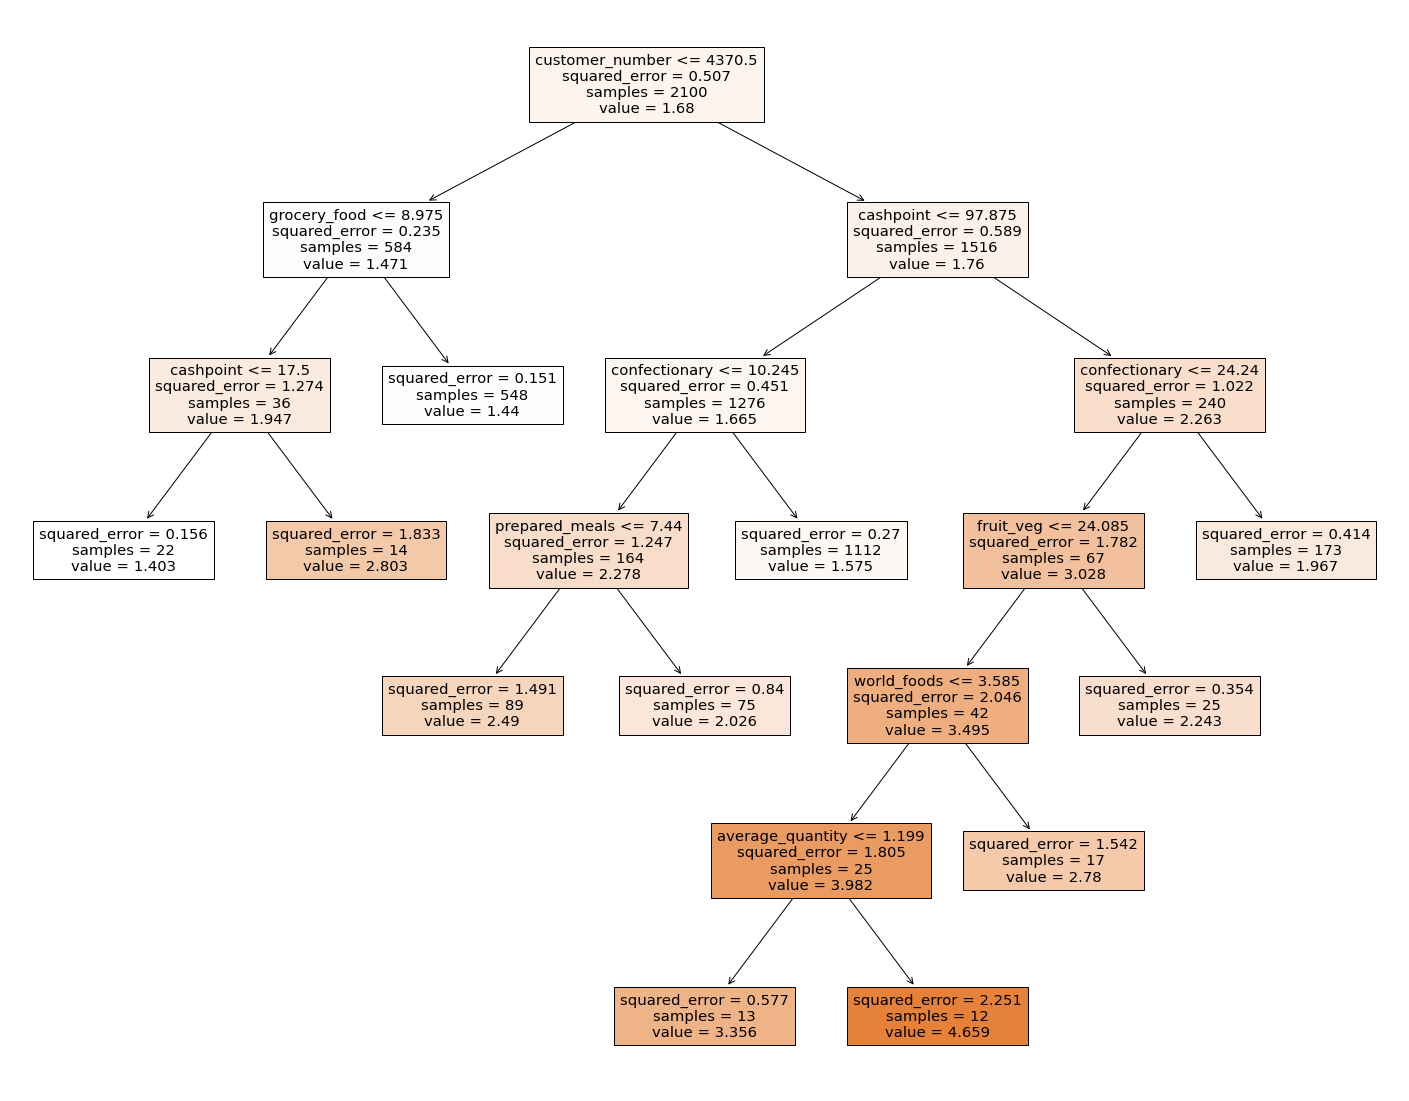

In [15]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, 
                   feature_names=feats,  
                   
                   filled=True)

In [16]:
from sklearn.tree import _tree
keys = []
def get_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i!= _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node, df,i):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            recurse(tree_.children_left[node], df, i)
            recurse(tree_.children_right[node],df, i)
        else:
            t = str(tree_.value[node])
            keys.append(t)
    recurse(0,df,0)  
get_rules(dtr, feats)

In [18]:
c = {}
values = range(len(keys))
for i in range(len(keys)):
    c[keys[i]] = values[i]


{'[[1.40272727]]': 0, '[[2.80285714]]': 1, '[[1.44]]': 2, '[[2.48988764]]': 3, '[[2.0256]]': 4, '[[1.57521583]]': 5, '[[3.35615385]]': 6, '[[4.65916667]]': 7, '[[2.78]]': 8, '[[2.2428]]': 9, '[[1.96676301]]': 10}


In [31]:
%timeit
import numpy as np
import pandas as pd
def get_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i!= _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    for i in range(len(df)):
        
        
        def recurse(node, df,i):
            
            if tree_.feature[node] != _tree.TREE_UNDEFINED:
                
                name = feature_name[node]
                
                threshold = tree_.threshold[node]
                
                if df[name].iloc[i]  <= np.round(threshold,3):
                    
                    recurse(tree_.children_left[node], df, i)
                else:
                    recurse(tree_.children_right[node],df, i)
            else:
                
                t = str(tree_.value[node])

                df.at[i,'Cluster'] = c[t]
            
                #i = i+1
        recurse(0,df,i)         
get_rules(dtr, feats)            

In [32]:
df['Cluster'].value_counts()

5     1617
2      768
10     245
3      132
4      100
9       36
0       29
8       24
6       20
1       16
7       13
Name: Cluster, dtype: int64

In [33]:
len(df)

3000